# Manual Testing

This file is designed to load in the saved models trained by main.py and evaluate them

In [1]:
from a2c_ppo_acktr import algo, utils
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from evaluation import evaluate

import matplotlib.pyplot as plt

def load_model(algo='ppo', env=None, filename=None):
    '''
    Load a trained model from the algorithm
    '''
    if env is None and filename is None:
        raise
    file = 'trained_models/' + algo + '/'
    if env is not None:
        file = file + env + '.pt'
    elif filename is not None:
        file = file + filename
        
    model, rms = torch.load(file)

    return model, rms
    
    

## Example: Test Correlated 2-arm Bandits

In [2]:
# env_name = 'CartPole-v1'
env_name = 'Bandits-v0'
model, rms = load_model(env=env_name, algo='a2c')
log_dir = '/tmp/gym/_eval'
device = torch.device("cpu")


In [3]:
all_obs, all_actions, all_rewards, all_hidden_states, eval_envs = evaluate(model, rms, env_name, 1, 10, log_dir, device)

 Evaluation using 10 episodes: mean reward 77.30000



In [4]:
all_obs2 = torch.zeros(size=[len(all_obs)] + list(all_obs[0].shape))
all_actions2 = torch.zeros(size=[len(all_actions)] + list(all_actions[0].shape))
all_rewards2 = torch.zeros(size=[len(all_rewards)] + list(all_rewards[0].shape))
all_hidden_states2 = torch.zeros(size=[len(all_hidden_states)] + list(all_hidden_states[0].shape))

for i in range(len(all_obs)):
    all_obs2[i] = all_obs[i]
    all_actions2[i] = all_actions[i]
    all_rewards2[i] = all_rewards[i]
    all_hidden_states2[i] = all_hidden_states[i]

In [7]:
reward_probabilities = eval_envs.get_attr('reward_probabilities')

In [19]:
second_arm_probs = []
second_arm_choices = []
for i in range(all_actions2.shape[1]):
    second_arm_choices.append(torch.mean(all_actions2.T[0][i]))
    second_arm_probs.append(reward_probabilities[i][1])

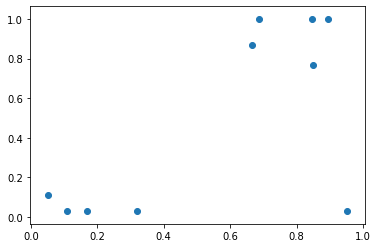

In [21]:
plt.scatter(second_arm_probs, second_arm_choices)

In [24]:
env = gym.make('Bandits-v0', num_arms=3)

In [29]:
env.step(2)

(array([0., 0., 1., 1., 5.]), 1, False, {})

In [30]:
env.reward_probabilities

array([0.32455324, 0.33017026, 0.3452765 ])